In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Weather Data.csv', encoding = 'unicode_escape')

In [3]:
df.shape

(8784, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [5]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [8]:
df.rename({'Date/Time':'Date and Time', 'Temp_C': 'Temperature_C', 'Press_kPa': 'Pressure_kPa'}, axis = 1, inplace = True)

In [9]:
df.columns

Index(['Date and Time', 'Temperature_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [10]:
df.head(5)

,Date and Time,Temperature_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [11]:
df.describe()

,Temperature_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [12]:
df.isna().count()

Date and Time       8784
Temperature_C       8784
Dew Point Temp_C    8784
Rel Hum_%           8784
Wind Speed_km/h     8784
Visibility_km       8784
Press_kPa           8784
Weather             8784
dtype: int64

In [20]:
df.index

RangeIndex(start=0, stop=8784, step=1)

In [23]:
df[['Temperature_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa']].dtypes

Temperature_C       float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
dtype: object

In [25]:
df[['Temperature_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa']].nunique()

Temperature_C       533
Dew Point Temp_C    489
Rel Hum_%            83
Wind Speed_km/h      34
Visibility_km        24
Press_kPa           518
dtype: int64

In [32]:
df[['Temperature_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa']].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8779    False
8780    False
8781    False
8782    False
8783    False
Length: 8784, dtype: bool

In [35]:
df['Temperature_C'].unique()

array([ -1.8,  -1.5,  -1.4,  -1.3,  -1. ,  -0.5,  -0.2,   0.2,   0.8,
         1.8,   2.6,   3. ,   3.8,   3.1,   3.2,   4. ,   4.4,   5.3,
         5.2,   4.6,   3.9,   3.7,   2.9,   2.3,   2. ,   1.9,   1.5,
         2.2,   1.7,   1.1,   0. ,  -0.7,  -2.1,  -4.1,  -4.8,  -5.6,
        -5.8,  -7. ,  -7.4,  -9. ,  -9.7, -10.5, -11.3, -12.6, -12.9,
       -13.3, -14. , -14.8, -15. , -15.3, -14.9, -15.1, -15.8, -16.3,
       -16.9, -17.3, -17. , -17.1, -17.5, -17.9, -18.1, -18.5, -18.6,
       -18.2, -17.8, -16.8, -15.2, -14.2, -13.7, -12.4, -10.2,  -9.4,
        -8.9,  -8.4,  -7.8,  -7.6,  -9.5,  -9.6,  -8.8,  -7.5,  -5.4,
        -5. ,  -8.2,  -7.1,  -6.1,  -6.6,  -6. ,  -4.7,  -4.4,  -5.1,
        -4.3,  -6.7,  -9.2,  -9.8,  -9.9, -10. , -10.6, -11.8, -12. ,
       -14.4, -12.3, -12.5, -11.7, -11.9, -11.2, -11.5, -11.6,  -9.3,
        -8.7,  -8.5,  -8.1,  -6.9,  -6.4,  -5.7,  -5.5,  -3.7,  -3.6,
        -3.1,  -3.2,  -3. ,   0.4,   0.6,  -0.6,  -1.7,  -3.5,  -5.9,
        -6.5,  -7.2,

In [36]:
df.columns

Index(['Date and Time', 'Temperature_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

Text(0.5, 1.0, 'count weather values')

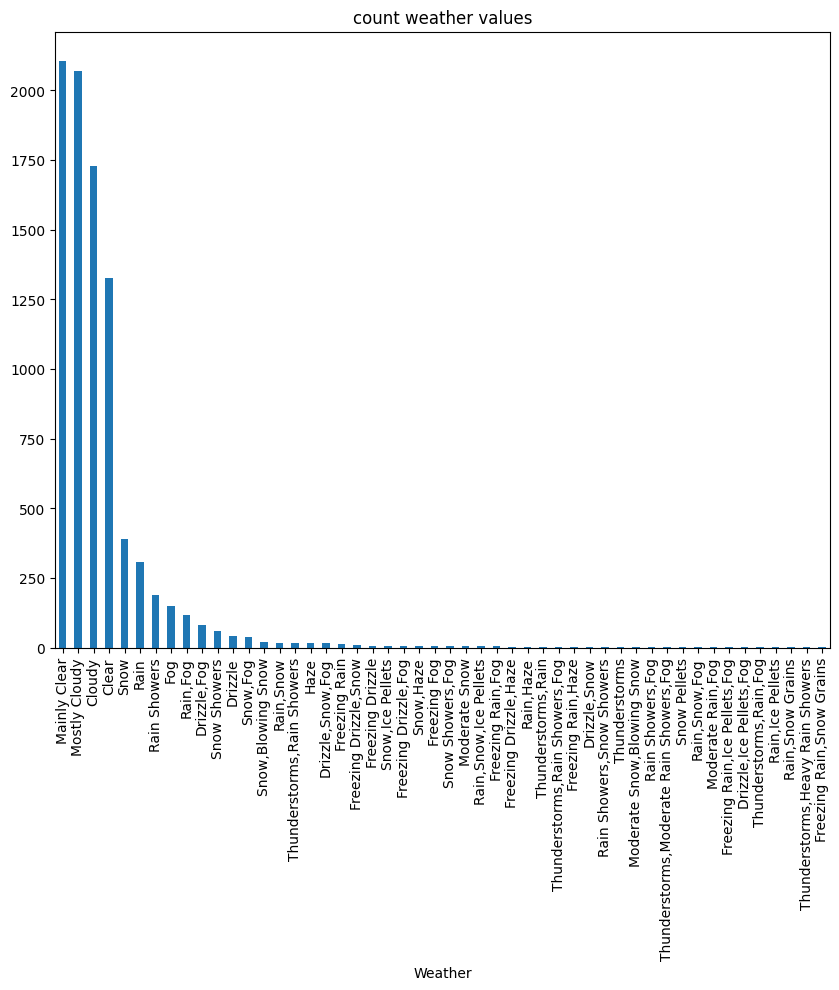

In [42]:
ax = df['Weather'].value_counts().plot(kind = 'bar', figsize = (10,8))
ax.set_xlabel('Weather')
ax.set_title('count weather values')

In [43]:
df.columns

Index(['Date and Time', 'Temperature_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [48]:
df['Wind Speed_km/h'].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2],
      dtype=int64)

<Axes: ylabel='Density'>

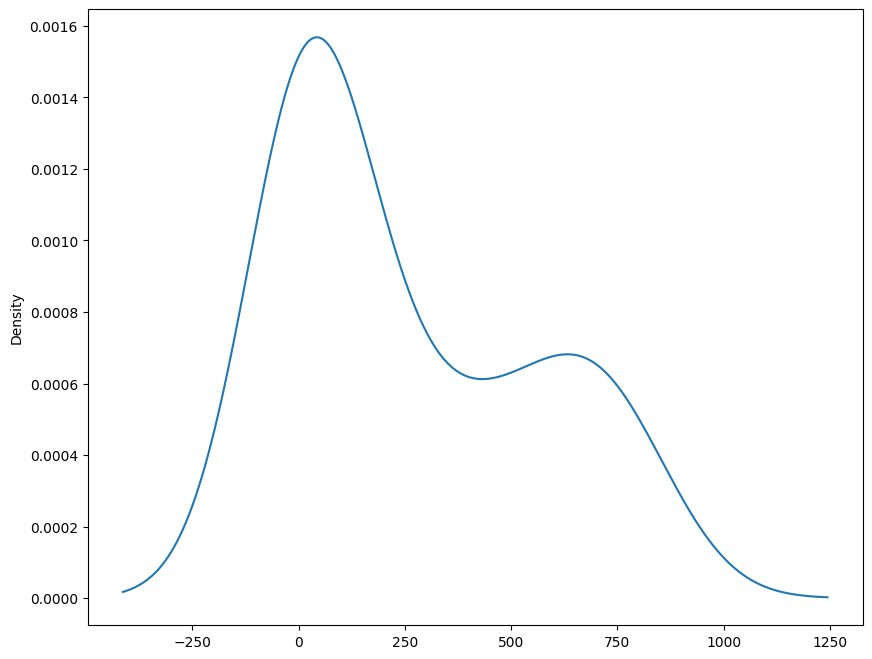

In [52]:
df['Wind Speed_km/h'].value_counts().plot(kind = 'kde', figsize = (10,8))

In [53]:
df['Visibility_km'].unique()

array([ 8. ,  4. ,  4.8,  6.4,  1.2, 12.9, 16.1, 25. , 19.3, 24.1,  9.7,
       11.3, 48.3,  3.2,  2.8,  2.4,  2. ,  0.8,  0.6,  1. ,  1.6,  3.6,
        0.2,  0.4])

In [54]:
df.head(5)

,Date and Time,Temperature_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [60]:
df.groupby(['Weather'], as_index = False).count()

,Weather,Date and Time,Temperature_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,Clear,1326,1326,1326,1326,1326,1326,1326
1,Cloudy,1728,1728,1728,1728,1728,1728,1728
2,Drizzle,41,41,41,41,41,41,41
3,"Drizzle,Fog",80,80,80,80,80,80,80
4,"Drizzle,Ice Pellets,Fog",1,1,1,1,1,1,1
5,"Drizzle,Snow",2,2,2,2,2,2,2
6,"Drizzle,Snow,Fog",15,15,15,15,15,15,15
7,Fog,150,150,150,150,150,150,150
8,Freezing Drizzle,7,7,7,7,7,7,7
9,"Freezing Drizzle,Fog",6,6,6,6,6,6,6


<Axes: xlabel='Weather'>

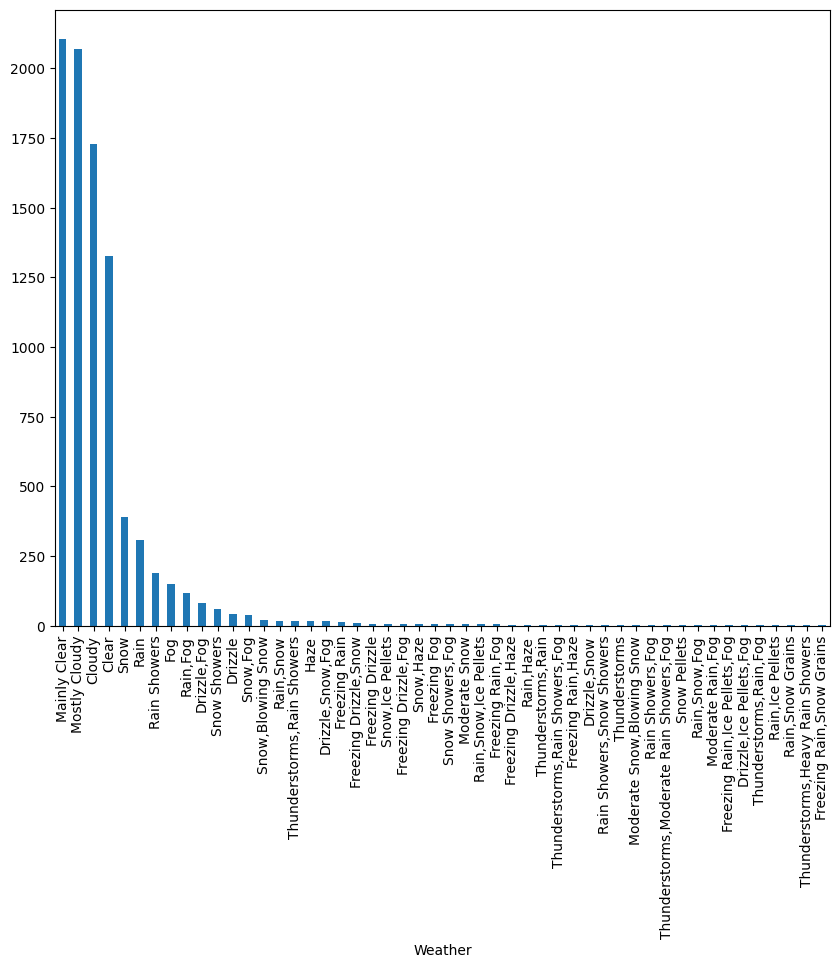

In [62]:
df['Weather'].value_counts().plot(kind = 'bar', figsize = (10,8))

In [67]:
df[df['Weather'] == 'Clear']

,Date and Time,Temperature_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,12/29/2012 1:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear


In [72]:
df.groupby(['Weather']).get_group('Clear')

,Date and Time,Temperature_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,12/29/2012 1:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear


In [73]:
df.columns

Index(['Date and Time', 'Temperature_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [80]:
df[df['Wind Speed_km/h']== 4].count()

Date and Time       474
Temperature_C       474
Dew Point Temp_C    474
Rel Hum_%           474
Wind Speed_km/h     474
Visibility_km       474
Press_kPa           474
Weather             474
dtype: int64

<Axes: xlabel='Wind Speed_km/h'>

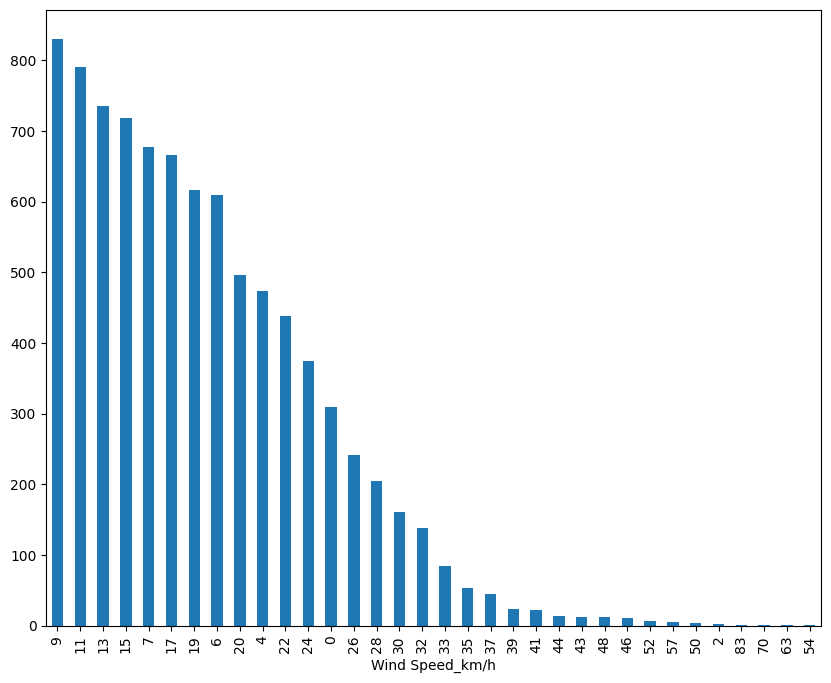

In [81]:
df['Wind Speed_km/h'].value_counts().plot(kind = 'bar', figsize = (10,8))

In [82]:
df.groupby(['Wind Speed_km/h']).get_group(4)

,Date and Time,Temperature_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
96,1/5/2012 0:00,-8.8,-11.7,79,4,9.7,100.32,Snow
101,1/5/2012 5:00,-7.0,-9.5,82,4,4.0,100.19,Snow
146,1/7/2012 2:00,-8.1,-11.1,79,4,19.3,100.15,Cloudy
...,...,...,...,...,...,...,...,...
8768,12/31/2012 8:00,-8.6,-10.3,87,4,3.2,101.14,Snow Showers
8769,12/31/2012 9:00,-8.1,-9.6,89,4,2.4,101.09,Snow
8770,12/31/2012 10:00,-7.4,-8.9,89,4,6.4,101.05,"Snow,Fog"
8772,12/31/2012 12:00,-5.8,-7.5,88,4,12.9,100.78,Snow


In [83]:
df.isna().sum()

Date and Time       0
Temperature_C       0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [84]:
df.columns

Index(['Date and Time', 'Temperature_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [85]:
df.rename({'Weather':'Weather conditions'}, axis = 1, inplace = True)

In [86]:
df.columns

Index(['Date and Time', 'Temperature_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather conditions'],
      dtype='object')

In [87]:
np.mean(df['Visibility_km'])

27.664446721311478

In [88]:
np.std(df['Press_kPa'])

0.8439567024167495

In [89]:
np.var(df['Rel Hum_%'])

286.21596270417155

In [93]:
df[df['Weather conditions'].str.contains('Snow')]

,Date and Time,Temperature_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather conditions
41,1/2/2012 17:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers
44,1/2/2012 20:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers
45,1/2/2012 21:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers
47,1/2/2012 23:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers
48,1/3/2012 0:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
